In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('adult.data')
df.head()



,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:

print(df.shape)
names = list(df.columns)
print(names)




(32560, 15)
['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


 <=50K
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


<Axes: xlabel=' <=50K'>

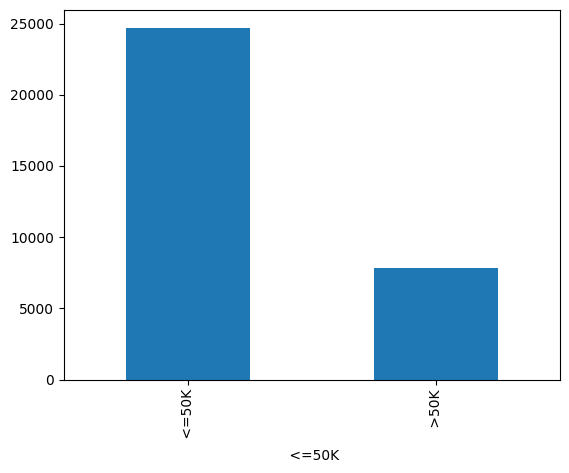

In [8]:

g = df[names[-1]].value_counts()
print(g)
g.plot.bar()

Label encoding

In [10]:

types = df.dtypes
print(types)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])
data = df.values
print(data[:2])




39                int64
 State-gov        int64
 77516            int64
 Bachelors        int64
 13               int64
 Never-married    int64
 Adm-clerical     int64
 Not-in-family    int64
 White            int64
 Male             int64
 2174             int64
 0                int64
 40               int64
 United-States    int64
 <=50K            int64
dtype: object
[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


Normalization

In [11]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])


(32560, 14)
(32560,)
[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


Split data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled,y,random_state=42)

KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#kNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = kNN.predict(X_test)# dự đoán
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5491  666]
 [ 881 1102]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6157
           1       0.62      0.56      0.59      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.72      0.73      8140
weighted avg       0.80      0.81      0.81      8140



Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[5361  796]
 [ 753 1230]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6157
           1       0.61      0.62      0.61      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.75      0.74      8140
weighted avg       0.81      0.81      0.81      8140



Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

# Huấn luyện mô hình
naive.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5361  796]
 [ 753 1230]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6157
           1       0.61      0.62      0.61      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.75      0.74      8140
weighted avg       0.81      0.81      0.81      8140

